In [1243]:
import pandas as pd

train_ftrs_df = pd.read_csv('train_x_region.csv')
train_labels_df = pd.read_csv('train_y.csv')
test_ftrs_df = pd.read_csv('test_x_region.csv')

# examine all of the df's, then construct giant dataframe to then refine

# examining the data

In [1244]:
train_ftrs_df

,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate,Region
0,2016,France,32,6.478,6.559000,1.394880,1.005080,0.837950,0.465620,0.178080,74264176,Europe & Central Asia
1,2018,Venezuela,102,4.806,0.996000,1.469000,0.657000,0.133000,0.052000,0.056000,29174393,Latin America & Caribbean
2,2019,Costa Rica,12,7.167,1.034000,1.441000,0.963000,0.558000,0.093000,0.144000,4657652,Latin America & Caribbean
3,2019,Bolivia,61,5.779,0.776000,1.209000,0.706000,0.511000,0.064000,0.137000,10286729,Latin America & Caribbean
4,2016,Nicaragua,48,5.992,6.107000,0.693840,0.895210,0.652130,0.465820,0.162920,5994622,Latin America & Caribbean
...,...,...,...,...,...,...,...,...,...,...,...,...
237,2017,Philippines,72,5.430,5.314665,0.857699,1.253918,0.468009,0.585215,0.193513,99766788,East Asia & Pacific
238,2018,United Kingdom,11,7.190,1.244000,1.433000,0.888000,0.464000,0.082000,0.262000,73917008,Europe & Central Asia
239,2017,Ethiopia,119,4.460,4.377271,0.339234,0.864669,0.353410,0.408843,0.312651,78815294,Sub-Saharan Africa
240,2019,India,140,4.015,0.755000,0.765000,0.588000,0.498000,0.085000,0.200000,1260422331,South Asia


We can see that the dataset above covers common factors that influence immiigration to the United States. There are 2 string value features, yet all of the others are quantitative values from the world Happiness report, largely relating to happiness around the certain feature (with the exception to year, ecnonomy, and population size).

In [1245]:
train_ftrs_df.describe()

,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,2.420000e+02
mean,2016.954545,58.037190,5.895496,2.884285,1.172189,0.882891,0.538545,0.258015,0.188854,8.774480e+07
std,1.435328,41.147073,1.051886,2.456517,0.307805,0.279914,0.177976,0.188388,0.117228,2.584785e+08
min,2015.000000,1.000000,3.006000,0.071200,0.107060,0.267000,0.013000,0.001000,0.000000,3.011010e+05
25%,2016.000000,23.000000,5.183750,0.982750,0.975545,0.707388,0.449185,0.083025,0.099000,7.347570e+06
50%,2017.000000,51.000000,5.946500,1.327460,1.234435,0.874320,0.546675,0.211095,0.162460,1.369083e+07
75%,2018.000000,88.750000,6.743750,5.377166,1.430750,1.021648,0.642162,0.427625,0.266100,7.318332e+07
max,2019.000000,156.000000,7.769000,7.590000,1.616463,1.558231,0.952770,0.635423,0.519120,1.567995e+09


The describe above enables us to see out features and the mean happinesses around particular features, seeing that things like generosity, government trust, and sense of freedom are all particularly low. This constrasts to features like happiness score, economy, and family, which are all slighlt higher, with happiness score holding the highest average. However, it's also important to note that the features with the highest averages also yield the highest standard deviations.

In [1246]:
train_ftrs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           242 non-null    int64  
 1   Country                        242 non-null    object 
 2   Happiness Rank                 242 non-null    int64  
 3   Happiness Score                242 non-null    float64
 4   Economy (GDP per Capita)       242 non-null    float64
 5   Family                         242 non-null    float64
 6   Health (Life Expectancy)       242 non-null    float64
 7   Freedom                        242 non-null    float64
 8   Trust (Government Corruption)  242 non-null    float64
 9   Generosity                     242 non-null    float64
 10  Population Estimate            242 non-null    int64  
 11  Region                         242 non-null    object 
dtypes: float64(7), int64(3), object(2)
memory usage: 2

From the informaton above, we can see there are no NAN/empty values, therefore we do not need to remove or fill in any values for out features.

In [1247]:
train_labels_df

,Immigration to the United States
0,5473.0
1,11481.0
2,2466.0
3,1425.0
4,3397.0
...,...
237,46542.0
238,11867.0
239,15678.0
240,51139.0


In [1248]:
train_labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 1 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Immigration to the United States  242 non-null    float64
dtypes: float64(1)
memory usage: 2.0 KB


Above, we looked at the train label, seeing that we will be looking at 'Immigration to the United States'. There are alos no null values present within this feature.

In [1249]:
test_ftrs_df

,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate,Region
0,2015,Uruguay,32,6.485,1.061660,1.208900,0.811600,0.603620,0.245580,0.232400,3997006,Latin America & Caribbean
1,2017,Brazil,22,6.635,6.544531,1.107353,1.431306,0.616552,0.437454,0.162350,216577789,Latin America & Caribbean
2,2019,Poland,40,6.182,1.206000,1.438000,0.884000,0.483000,0.050000,0.117000,48520464,Europe & Central Asia
3,2016,Spain,37,6.361,6.434000,1.342530,1.129450,0.878960,0.375450,0.061370,48608228,Europe & Central Asia
4,2017,Bulgaria,105,4.714,4.624306,1.161459,1.434379,0.708218,0.289232,0.113178,9603624,Europe & Central Asia
...,...,...,...,...,...,...,...,...,...,...,...,...
56,2019,China,93,5.191,1.029000,1.125000,0.893000,0.521000,0.100000,0.058000,1584929709,East Asia & Pacific
57,2017,Australia,10,7.284,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,23403215,East Asia & Pacific
58,2018,Iran,106,4.707,1.059000,0.771000,0.691000,0.459000,0.129000,0.282000,78574546,Middle East & North Africa
59,2016,Italy,50,5.977,6.056000,1.354950,1.041670,0.851020,0.188270,0.025560,70112681,Europe & Central Asia


In [1250]:
test_ftrs_df.describe()

,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,6.100000e+01
mean,2017.131148,45.524590,6.192492,3.444304,1.307646,0.987012,0.596495,0.251455,0.189983,6.347058e+07
std,1.347534,38.006844,0.991394,2.683024,0.186244,0.286919,0.191442,0.200354,0.124396,2.033915e+08
min,2015.000000,1.000000,3.069000,0.336000,0.747190,0.148660,0.154000,0.006490,0.000000,3.562125e+06
25%,2016.000000,13.000000,5.524000,1.073000,1.198274,0.805000,0.483000,0.078000,0.113178,9.603624e+06
50%,2017.000000,32.000000,6.419000,1.376000,1.354950,0.931560,0.607120,0.188270,0.162350,1.910574e+07
75%,2018.000000,71.000000,7.072000,6.346870,1.443572,1.163740,0.795040,0.412730,0.261000,4.860823e+07
max,2019.000000,156.000000,7.526000,7.592000,1.577440,1.540247,0.914910,0.620071,0.492774,1.584930e+09


Looking at the descripton of the test features, one can see that the average values for the features are slightly higher and standard deviations are very slightly smaller.

In [1251]:
# making the dataframe out of the training data to plot data and look at correlations, to help feature engineer
concated_df = pd.concat([train_ftrs_df,train_labels_df], axis=1)
concated_df

,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate,Region,Immigration to the United States
0,2016,France,32,6.478,6.559000,1.394880,1.005080,0.837950,0.465620,0.178080,74264176,Europe & Central Asia,5473.0
1,2018,Venezuela,102,4.806,0.996000,1.469000,0.657000,0.133000,0.052000,0.056000,29174393,Latin America & Caribbean,11481.0
2,2019,Costa Rica,12,7.167,1.034000,1.441000,0.963000,0.558000,0.093000,0.144000,4657652,Latin America & Caribbean,2466.0
3,2019,Bolivia,61,5.779,0.776000,1.209000,0.706000,0.511000,0.064000,0.137000,10286729,Latin America & Caribbean,1425.0
4,2016,Nicaragua,48,5.992,6.107000,0.693840,0.895210,0.652130,0.465820,0.162920,5994622,Latin America & Caribbean,3397.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2017,Philippines,72,5.430,5.314665,0.857699,1.253918,0.468009,0.585215,0.193513,99766788,East Asia & Pacific,46542.0
238,2018,United Kingdom,11,7.190,1.244000,1.433000,0.888000,0.464000,0.082000,0.262000,73917008,Europe & Central Asia,11867.0
239,2017,Ethiopia,119,4.460,4.377271,0.339234,0.864669,0.353410,0.408843,0.312651,78815294,Sub-Saharan Africa,15678.0
240,2019,India,140,4.015,0.755000,0.765000,0.588000,0.498000,0.085000,0.200000,1260422331,South Asia,51139.0


# features / feature engineering:

In [1252]:
# find correlation matrix of concat_df
correlation = concated_df.corr()
correlation['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
Population Estimate                 0.445795
Family                             -0.186854
Generosity                         -0.170803
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
Trust (Government Corruption)      -0.058378
Freedom                            -0.042866
Economy (GDP per Capita)           -0.030175
Year                               -0.017201
Name: Immigration to the United States, dtype: float64

From the correlation analysis above, it's evident that high population is the most influential factor on immigration to the US. There are slight correlations to less families, lower perceived genorosity, lower life expectancy, and lower happiness within a home country, yet they don't prove to be strong.

<function matplotlib.pyplot.show(close=None, block=None)>

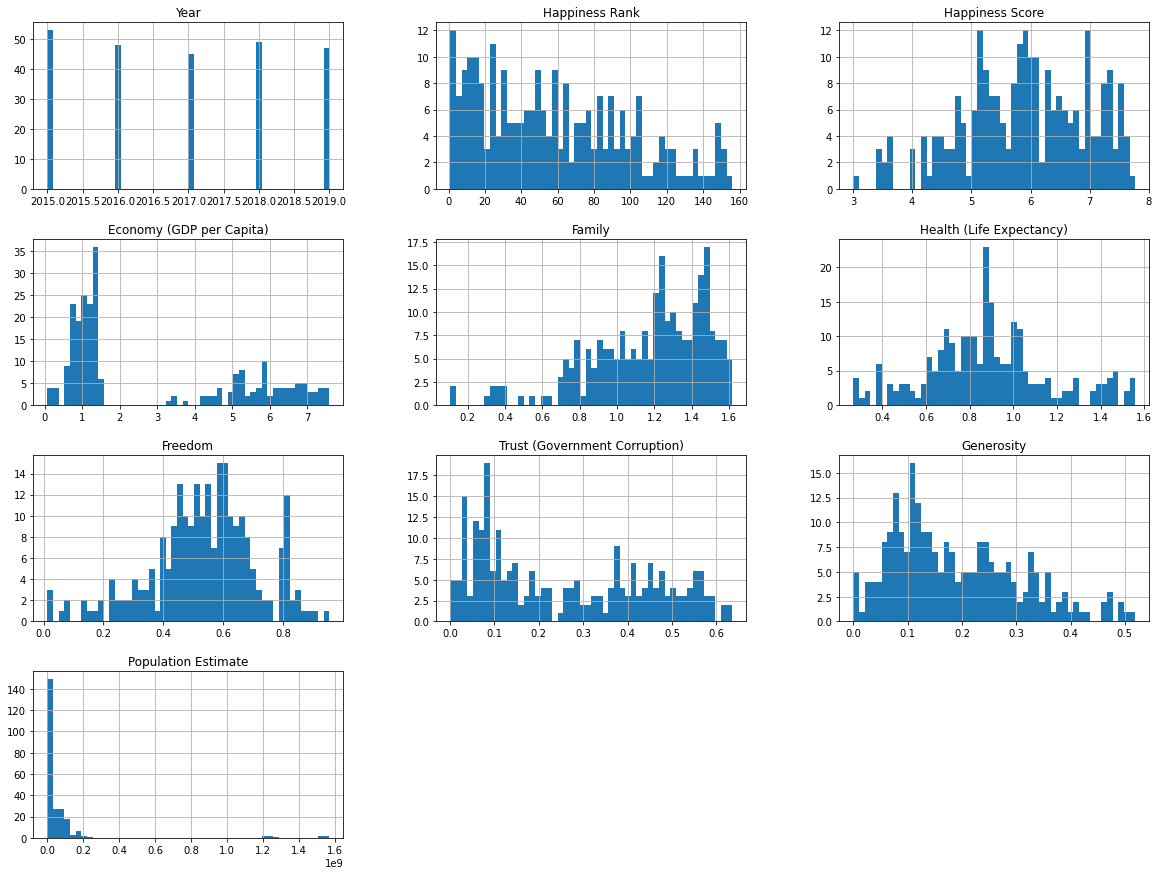

In [1255]:
import matplotlib.pyplot as plt

train_ftrs_df.hist(bins=50, figsize=(20,15))
plt.show

array([[<AxesSubplot:xlabel='Happiness Rank', ylabel='Happiness Rank'>,
        <AxesSubplot:xlabel='Happiness Score', ylabel='Happiness Rank'>,
        <AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Rank'>,
        <AxesSubplot:xlabel='Family', ylabel='Happiness Rank'>,
        <AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Rank'>,
        <AxesSubplot:xlabel='Freedom', ylabel='Happiness Rank'>,
        <AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Rank'>,
        <AxesSubplot:xlabel='Generosity', ylabel='Happiness Rank'>,
        <AxesSubplot:xlabel='Population Estimate', ylabel='Happiness Rank'>],
       [<AxesSubplot:xlabel='Happiness Rank', ylabel='Happiness Score'>,
        <AxesSubplot:xlabel='Happiness Score', ylabel='Happiness Score'>,
        <AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>,
        <AxesSubplot:xlabel='Family', ylabel='Happiness Score'>,
        <AxesSubplot:xlabel='Healt

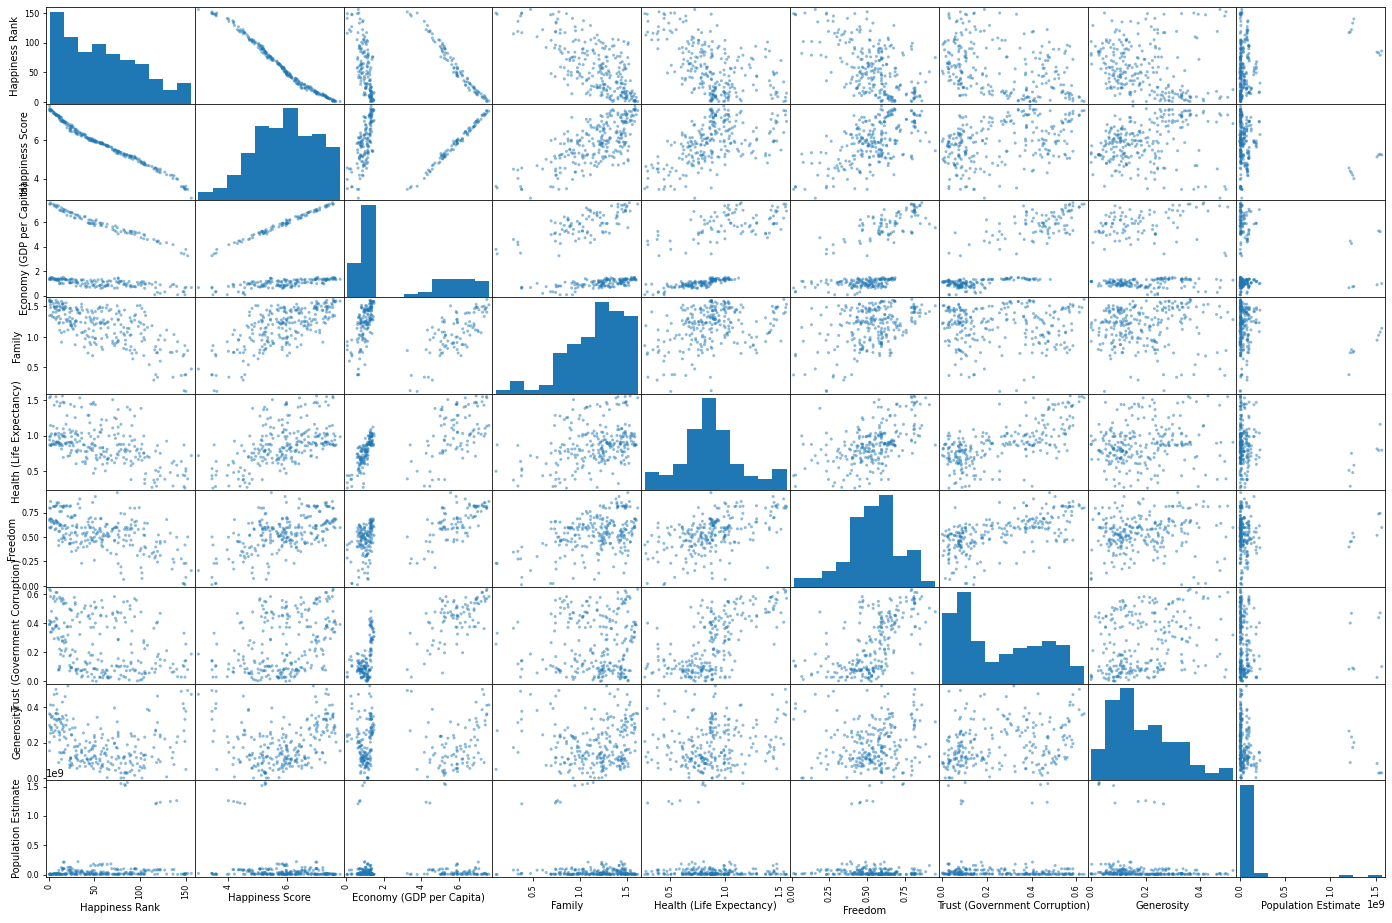

In [1256]:
from pandas.plotting import scatter_matrix

attributes = ['Happiness Rank','Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Population Estimate']
scatter_matrix(train_ftrs_df[attributes], figsize=(24,16))

The scatter plots above show very loose linear correlations, with some being more defined than others, and many being soo loose/dispersed that they are negligible. Family and Hapiness Score is an example of a stronger correlation. Once the value for economy grows larger, we also see a strong linear maping, yet the very lowest values of economy see a wide variety of happiness.

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

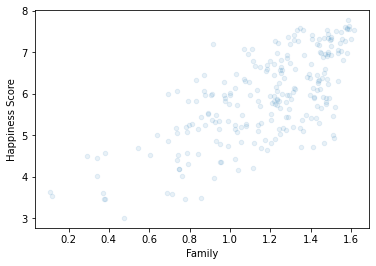

In [1257]:
train_ftrs_df.plot(kind='scatter',x='Family',y='Happiness Score',alpha=0.1)

Here we see there's a linear-esque/relatively strong correlation with happiness score and family; I have a hypothesis that lower family happiness and lower overall hapiness score of the origin country will lead to much more immigration.

In [1258]:
correlation['Happiness Score'].sort_values(ascending=False, key=abs)

Happiness Score                     1.000000
Happiness Rank                     -0.991314
Family                              0.698523
Freedom                             0.576130
Health (Life Expectancy)            0.513560
Trust (Government Corruption)       0.386655
Generosity                          0.222629
Population Estimate                -0.217042
Economy (GDP per Capita)            0.185357
Immigration to the United States   -0.134443
Year                               -0.004539
Name: Happiness Score, dtype: float64

In [1259]:
#creating a feature that combines family happiness and overall happiness
concated_df['Happiness and Family Score'] = concated_df['Family']*concated_df['Happiness Score']
corr_matrix = concated_df.corr()
corr_matrix['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
Population Estimate                 0.445795
Happiness and Family Score         -0.199407
Family                             -0.186854
Generosity                         -0.170803
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
Trust (Government Corruption)      -0.058378
Freedom                            -0.042866
Economy (GDP per Capita)           -0.030175
Year                               -0.017201
Name: Immigration to the United States, dtype: float64

we can see that the feature created via combination of family and happiness score has a stronger correlaton than other existing features, though not by much at all

In [1260]:
# engineering/creating a feature that combines trust and freedom
# hypothesis is that low trust and low sense of freedom together lead to higher immigration

concated_df['Gov Trust and Sense of Freedom'] = concated_df['Trust (Government Corruption)']*concated_df['Freedom']
corr_matrix = concated_df.corr()
corr_matrix['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
Population Estimate                 0.445795
Happiness and Family Score         -0.199407
Family                             -0.186854
Generosity                         -0.170803
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
Gov Trust and Sense of Freedom     -0.083605
Trust (Government Corruption)      -0.058378
Freedom                            -0.042866
Economy (GDP per Capita)           -0.030175
Year                               -0.017201
Name: Immigration to the United States, dtype: float64

Gov Trust and Sense of Freedom is not as strong as a feature as hypothesized, yet stronger than the 2 features alone.

Another hypothesis for a feature is tying family happiness and economy (GDP) together. I think that happier families with more money are less likely to immigrate from their homes.

In [1261]:
# creating the feature combining family happiness and origin country's GDP
concated_df['Family Happiness and Money'] = concated_df['Family']*concated_df['Economy (GDP per Capita)']
corr_matrix = concated_df.corr()
corr_matrix['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
Population Estimate                 0.445795
Happiness and Family Score         -0.199407
Family                             -0.186854
Generosity                         -0.170803
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
Family Happiness and Money         -0.090428
Gov Trust and Sense of Freedom     -0.083605
Trust (Government Corruption)      -0.058378
Freedom                            -0.042866
Economy (GDP per Capita)           -0.030175
Year                               -0.017201
Name: Immigration to the United States, dtype: float64

I also hypothesize that higher family happiness and higher generosity amongst neighbors within a country will lead to decreased immigration, as there's a sense of community ans contentment.

In [1262]:
# creating the combination of family happiness and generosity within country's communities
concated_df['Family+Community Generosity'] = concated_df['Family']*concated_df['Generosity']
corr_matrix = concated_df.corr()
corr_matrix['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
Population Estimate                 0.445795
Family+Community Generosity        -0.230415
Happiness and Family Score         -0.199407
Family                             -0.186854
Generosity                         -0.170803
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
Family Happiness and Money         -0.090428
Gov Trust and Sense of Freedom     -0.083605
Trust (Government Corruption)      -0.058378
Freedom                            -0.042866
Economy (GDP per Capita)           -0.030175
Year                               -0.017201
Name: Immigration to the United States, dtype: float64

Here we can see that this new feature encompassing family happiness and generosity amongst neigbors of a country does have an negative impact on the amount of immigration from the origin country, providing evidence to the success of our new feature. Since that feature was relatively successful, I'll add it to the test set below, along with the other newly engineeringed features.

In [1263]:
# mirror test ftrs with train ftrs
test_ftrs_df['Family+Community Generosity'] = concated_df['Family']*concated_df['Generosity']
test_ftrs_df['Gov Trust and Sense of Freedom'] = concated_df['Trust (Government Corruption)']*concated_df['Freedom']
test_ftrs_df['Family Happiness and Money'] = concated_df['Family']*concated_df['Economy (GDP per Capita)']
test_ftrs_df['Happiness and Family Score'] = concated_df['Family']*concated_df['Happiness Score']

In [1264]:
# here, I am dropping features that don't seem to have much correlation
concated_df.drop(['Year'], axis=1, inplace=True)
test_ftrs_df.drop(['Year'], axis=1, inplace=True)
concated_df.drop(['Economy (GDP per Capita)'], axis=1, inplace=True)
test_ftrs_df.drop(['Economy (GDP per Capita)'], axis=1, inplace=True)
concated_df.drop(['Freedom'], axis=1, inplace=True)
test_ftrs_df.drop(['Freedom'], axis=1, inplace=True)

# Removing strings (maybe replace if needed)

In [1265]:
test_ftrs_df.drop(['Country'], axis=1, inplace=True)
test_ftrs_df.drop(['Region'], axis=1, inplace=True)
test_ftrs_df

,Happiness Rank,Happiness Score,Family,Health (Life Expectancy),Trust (Government Corruption),Generosity,Population Estimate,Family+Community Generosity,Gov Trust and Sense of Freedom,Family Happiness and Money,Happiness and Family Score
0,32,6.485,1.208900,0.811600,0.245580,0.232400,3997006,0.248400,0.390166,9.149018,9.036033
1,22,6.635,1.107353,1.431306,0.437454,0.162350,216577789,0.082264,0.006916,1.463124,7.060014
2,40,6.182,1.438000,0.884000,0.050000,0.117000,48520464,0.207504,0.051894,1.489994,10.327647
3,37,6.361,1.342530,1.129450,0.375450,0.061370,48608228,0.165633,0.032704,0.938184,6.986811
4,105,4.714,1.161459,1.434379,0.289232,0.113178,9603624,0.113040,0.303775,4.237281,4.157489
...,...,...,...,...,...,...,...,...,...,...,...
56,93,5.191,1.125000,0.893000,0.100000,0.058000,1584929709,0.125118,0.001833,0.233982,1.308636
57,10,7.284,1.484415,1.510042,0.601607,0.477699,23403215,0.478091,0.458082,8.390428,8.245401
58,106,4.707,0.771000,0.691000,0.129000,0.282000,78574546,0.086388,0.045505,1.299576,8.122976
59,50,5.977,1.354950,1.041670,0.188270,0.025560,70112681,0.242811,0.234228,2.126580,12.329403


In [1266]:
train_labels_df

,Immigration to the United States
0,5473.0
1,11481.0
2,2466.0
3,1425.0
4,3397.0
...,...
237,46542.0
238,11867.0
239,15678.0
240,51139.0


In [1267]:
concated_df.drop(['Country'], axis=1, inplace=True)
concated_df.drop(['Region'], axis=1, inplace=True)
# drop immigration, to make the concated_df solely the train features again, without the target
concated_df.drop(['Immigration to the United States'], axis=1, inplace=True)
concated_df

,Happiness Rank,Happiness Score,Family,Health (Life Expectancy),Trust (Government Corruption),Generosity,Population Estimate,Happiness and Family Score,Gov Trust and Sense of Freedom,Family Happiness and Money,Family+Community Generosity
0,32,6.478,1.394880,1.005080,0.465620,0.178080,74264176,9.036033,0.390166,9.149018,0.248400
1,102,4.806,1.469000,0.657000,0.052000,0.056000,29174393,7.060014,0.006916,1.463124,0.082264
2,12,7.167,1.441000,0.963000,0.093000,0.144000,4657652,10.327647,0.051894,1.489994,0.207504
3,61,5.779,1.209000,0.706000,0.064000,0.137000,10286729,6.986811,0.032704,0.938184,0.165633
4,48,5.992,0.693840,0.895210,0.465820,0.162920,5994622,4.157489,0.303775,4.237281,0.113040
...,...,...,...,...,...,...,...,...,...,...,...
237,72,5.430,0.857699,1.253918,0.585215,0.193513,99766788,4.657307,0.273886,4.558384,0.165976
238,11,7.190,1.433000,0.888000,0.082000,0.262000,73917008,10.303270,0.038048,1.782652,0.375446
239,119,4.460,0.339234,0.864669,0.408843,0.312651,78815294,1.512983,0.144489,1.484919,0.106062
240,140,4.015,0.765000,0.588000,0.085000,0.200000,1260422331,3.071475,0.042330,0.577575,0.153000


# Modeling
(no need to split the dataframe, as it's already solely training data)

FIRST -- we split into test and train

In [1268]:
import numpy as np
from sklearn.model_selection import train_test_split
# do a train test split on initial training data (do model.fit on train_x train_y & model.predict on test_x)

# train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.2)
train_x, test_x, train_y, test_y = train_test_split(concated_df, train_labels_df, test_size=0.2)

# Linear regression testing:

In [1269]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
reg.fit(train_x , train_y)

LinearRegression()

In [1270]:
# testing the model
hyp = reg.predict(test_x)
hyp

array([[ 9792.19329053],
       [ 4562.0005593 ],
       [ 8279.82245094],
       [ 7472.38731651],
       [  264.76523164],
       [11663.46698427],
       [ 8554.01117357],
       [27074.19066103],
       [ 5539.12054231],
       [ 5078.59098991],
       [29276.85479625],
       [19626.73774307],
       [10034.60127002],
       [22231.5638072 ],
       [15201.00285717],
       [19198.35800708],
       [14723.65861338],
       [12836.37832557],
       [ 6503.82534478],
       [ 8577.62591086],
       [15299.6265119 ],
       [ 7995.06898284],
       [18578.13258784],
       [17336.58212301],
       [14262.51205426],
       [19180.15385322],
       [ 9059.34844841],
       [12876.68253687],
       [11252.17799985],
       [ 9038.3399358 ],
       [10584.25721471],
       [-5078.12502184],
       [15462.06252246],
       [  231.57626676],
       [18372.41573597],
       [-3633.03056658],
       [20902.20761478],
       [64873.60855324],
       [75036.48429084],
       [ 4972.3948717 ],


In [1273]:
# checking for amount/level of error via MSE

mean_squared_error(test_y, hyp)

98302859.97418524

In [1274]:
# checking RMSE
np.sqrt(mean_squared_error(test_y, hyp))

9914.779875225937

# Lasso testing:

In [1275]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

params = { 'alpha' : [1e-3, 0.01, 0.1, 1, 10, 15, 50, 100, 1000]}
lasso = Lasso()

#regressor
# using mean squared error for scoring, as I've read that r^2 is not ideal for lasso scoring
reg = GridSearchCV(lasso, params, scoring='neg_mean_squared_error')

reg.fit(train_x, train_y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30591277217.36566, tolerance: 8603094.450644156
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49396103456.806496, tolerance: 11750349.412922727
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38701810996.6966, tolerance: 10350153.705722727
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarn

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 15, 50, 100, 1000]},
             scoring='neg_mean_squared_error')

In [1276]:
reg.best_score_
# on the validation set -- the error on the training set itself

-585073075.4535056

In [1277]:
reg.score(train_x, train_y)

-560579703.5604177

In [1280]:
# check MSE
mean_squared_error(test_y, reg.predict(test_x))

78808249.72308052

In [1281]:
# check RMSE
np.sqrt(mean_squared_error(test_y, reg.predict(test_x)))

8877.401068053674

In [1282]:
reg.best_params_

{'alpha': 1000}

# Ridge Testing:

In [1283]:
from sklearn.linear_model import Ridge

# have to set constraints in ridge
ridge = Ridge(alpha=10)
ridge.fit(train_x, train_y)

# use validation -- take trainng set, split it into train and validation, get training on validation set, test on validatoin set
mean_squared_error(test_y, ridge.predict(test_x))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.97698e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


87352690.0344488

In [1284]:
# check RMSE
np.sqrt(mean_squared_error(test_y, ridge.predict(test_x)))

9346.266101200457

In [1240]:
# regressor 
reg = GridSearchCV(ridge, params, scoring='neg_mean_squared_error')
reg.fit(train_x, train_y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.74803e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.86279e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.06436e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.64137e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.16914e-21): result may not be accurate

GridSearchCV(estimator=Ridge(alpha=10),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 15, 50, 100, 1000]},
             scoring='neg_mean_squared_error')

In [1241]:
reg.best_score_

-315607060.27461636

In [1242]:
reg.score(train_x, train_y)

-300825652.2747968

# model analysis:
From the testing above, we can see that the Ridge and Lasso models produce the least error values and very similar scores. Though these values changed everytime I ran through the whole program, I ran it 5 times and saw which models generally performed the best (those models being ridge and Lasso). Therefore, we will be using the Lasso model, which had the lowest error 3 out of the 5 runs, to produce our predictions for the target on the test set.

# creating the prediction:

In [1287]:
lasso.fit(train_x, train_y)
predictions = lasso.predict(test_ftrs_df)
predictions

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52102360493.267456, tolerance: 13287381.199155442
  model = cd_fast.enet_coordinate_descent(


array([-291369.09312137, -198125.02011145, -341326.02604932,
       -197325.0938409 , -122578.20195631, -112529.58301406,
       -367289.0342757 , -119589.80026251, -173097.28084478,
       -244072.28325316,  -29852.38240421,   14326.78022025,
        -73306.50560307, -122994.35198729, -137495.80765536,
       -357649.11415616, -280714.85930348, -288615.49874178,
       -230649.41162048, -351109.07009834, -384270.55248097,
       -281126.40122447,  -98831.90897985, -108852.1154912 ,
       -120858.53093148, -201310.04091617, -255380.41423529,
       -187548.02645957, -361564.59547235,  -50295.29528446,
        -78390.50583927, -211727.95695655, -297233.80724927,
       -191008.23619044,  -93135.44539466, -204184.99342033,
        -80671.39164218, -214040.89766165, -230814.90177413,
        -26095.10599625, -257402.71041332, -224352.19528764,
       -280112.53281227, -138943.18374046, -118379.69722151,
       -185944.2966532 , -134708.63579454,   96998.97845039,
       -171030.97837568,

In [1289]:
dc1_predictions = pd.DataFrame(predictions)
dc1_predictions.to_csv("dc1.csv")